In [121]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import seaborn as sns

In [33]:
df = pd.read_csv("heart.csv")
df.shape

(270, 5)

In [75]:
df = df.dropna()
df.head(3)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1


## General Review

In [164]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [76]:
df.groupby("heart disease").mean()

,age,sex,BP,cholestrol
heart disease,,,,
0,52.706667,0.553333,128.866667,244.213333
1,56.591667,0.833333,134.441667,256.466667


## Test and train sets

In [77]:
y = df[["cholestrol"]]
X = df.drop(["cholestrol"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=99)

# Linear Regression

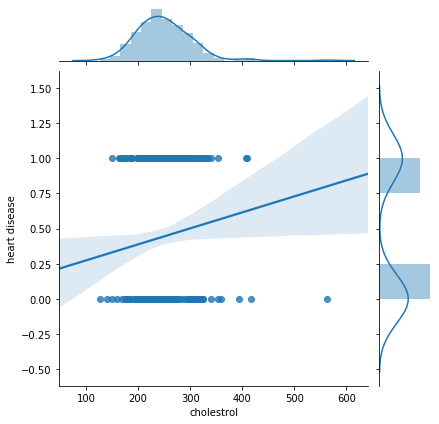

In [78]:
sns.jointplot(x="cholestrol",y="heart disease",data=df,kind = "reg")

In [79]:
lin_model = LinearRegression().fit(X_train,y_train)
p=lin_model.predict(X_test)[:5]
p = pd.DataFrame(p)
p

,0
0,258.275582
1,244.182281
2,247.877882
3,225.011943
4,270.864873


In [102]:
np.sqrt(mean_squared_error(y_test,lin_model.predict(X_test)))

39.471616000211554

# Rigde Regression

In [103]:
ridge_model = Ridge().fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,ridge_model.predict(X_test)))

39.50847597643231

In [104]:
lambdas = np.linspace(0.01,2,200)
ridge_cv_model = RidgeCV(alphas = lambdas,scoring="neg_mean_squared_error",cv=10,normalize=True)

In [105]:
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.24000000000000002

In [106]:
np.sqrt(mean_squared_error(y_test,ridge_cv_model.predict(X_test)))

39.57468281617685

# Lasso Regression

In [111]:
lasso_model = Lasso().fit(X_train,y_train)
l_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,l_pred))

40.3609467647526

In [115]:
lasso_cv = LassoCV(cv=10,max_iter = 10000).fit(X_train,y_train)
l_cv_pred = lasso_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test,l_cv_pred))

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


39.58988169860018

# ElasticNet Regression

In [117]:
enet_model = ElasticNet().fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test,enet_model.predict(X_test)))

41.19608077514204

In [125]:
enet_cv = ElasticNetCV(cv=10).fit(X_train,y_train)
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(X_train,y_train)

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
np.sqrt(mean_squared_error(y_test,enet_tuned.predict(X_test)))

40.512628827063295

# KNN

In [127]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [128]:
knn_model.predict(X_test)[:5]

array([[243.2],
       [208. ],
       [234.2],
       [242.2],
       [286. ]])

In [130]:
np.sqrt(mean_squared_error(y_test,knn_model.predict(X_test)))

45.04202975493494

In [156]:
knn_params = {"n_neighbors":np.arange(1,100,1)}
knn_params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}

In [157]:
knn_cv_model = GridSearchCV(knn_model,knn_params,cv=10).fit(X_train,y_train)
knn_cv_model.best_params_

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 54}

In [158]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)
knn_tuned.predict(X_test)[:5]

array([[252.31481481],
       [236.7037037 ],
       [256.55555556],
       [232.27777778],
       [262.62962963]])

In [159]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

41.0070789009882

# Support Vector Reg

In [140]:
svr_model = SVR("linear").fit(X_train,y_train)
y_predict = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predict))

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


39.97016025074251

In [163]:
svr_params = {"C":np.linspace(0.1,100,100)}
svr_params

{'C': array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
          4.13636364,   5.14545455,   6.15454545,   7.16363636,
          8.17272727,   9.18181818,  10.19090909,  11.2       ,
         12.20909091,  13.21818182,  14.22727273,  15.23636364,
         16.24545455,  17.25454545,  18.26363636,  19.27272727,
         20.28181818,  21.29090909,  22.3       ,  23.30909091,
         24.31818182,  25.32727273,  26.33636364,  27.34545455,
         28.35454545,  29.36363636,  30.37272727,  31.38181818,
         32.39090909,  33.4       ,  34.40909091,  35.41818182,
         36.42727273,  37.43636364,  38.44545455,  39.45454545,
         40.46363636,  41.47272727,  42.48181818,  43.49090909,
         44.5       ,  45.50909091,  46.51818182,  47.52727273,
         48.53636364,  49.54545455,  50.55454545,  51.56363636,
         52.57272727,  53.58181818,  54.59090909,  55.6       ,
         56.60909091,  57.61818182,  58.62727273,  59.63636364,
         60.64545455,  61.65454545,

In [161]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=3,n_jobs=-1).fit(X_train,y_train)
svr_cv_model.best_params_

C:\Users\ardaa_iyfsapc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 4.138383838383838}

In [162]:
y_predict = svr_cv_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predict))

39.244859927750824

# Yapay Sinir Ağları